# Analysis of General Linear Model

### Example 1.
Consider the following model:
    a. $y_1={\beta}_1+{\beta}_2 +{\varepsilon}_1,\ \ \ y_2={\beta }_1+{\beta }_3+{\varepsilon }_2,\ \ y_3={\beta }_1+{\beta }_2+{\varepsilon}_3.$
    b. $y_i={\beta }_1+{\beta }_2x_i+{\varepsilon }_i,\ (i=1,2,3)$
        where $x_1=-1,{\ x}_2=0,\ x_3=1.$
    Write these models in Gauss-Markoff setup. Find the blues of ${\beta }_i\mathrm{s.}$

In [20]:
print("Hello Python World")

Hello Python World


### Example 2. 
Consider the following model.
   $$y_{i} =\theta_{i} +\theta_{5} +\varepsilon_{i} ,\, \, \, i=1,2,3$$
   $$y_{6} =\theta_{3} +\theta_{7} +\varepsilon_{6}$$
   $$y_{4} =\theta_{4} +\theta_{6} +\varepsilon_{4}$$
   $$y_{7} =\theta_{2} +\theta_{8} +\varepsilon_{7}$$
   $$y_{5} =\theta_{1} +\theta_{7} +\varepsilon_{5}$$
   $$y_{8} =\theta_{4} +\theta_{8} +\varepsilon_{8}$$

    a.  Write the model in Gauss-Markoff setup and find rank of error
        space and estimation space.
    b.  Check the estimability of the following parametric functions. 
        1.$\theta_{2} -\theta_{4}$
        2.$\theta_{1} +\theta_{2} +\theta_{3} +3\theta_{5}$
        3.$\theta_{1} -\theta_{2}$
        4.$\theta_{3} +2\theta_{5} -\theta_{1} -2\theta_{8}$
    c.  If
       $\underline{Y}=\left(60.2\, \, \, 74.39\, \, \, 77.88\, \, \, 94.75\, \, \, 81.47\, \, \, 99.34\, \, \, 111.86\, \, \, 127.68\right)^{'}$
        obtain two different solutions to normal equations and verify
        that the BLUE of an estimable parametric function is unique even
        though two different solutions to normal equations are used.
    d.  Obtain an estimate of error variance, BLUE of
       $X\underline{\beta }$ and variance-covariance of the BLUE of
       $X\underline{\beta }$

In [23]:
import numpy as np
from numpy import linalg
Y=np.array([['y1'],['y2'],['y3'],['y4'],['y5'],['y6'],['y7'],['y8']])
X=np.array([[1,0,0,0,1,0,0,0],[0,1,0,0,1,0,0,0],[0,0,1,0,1,0,0,0],[0,0,0,1,0,1,0,0],[1,0,0,0,0,0,1,0],[0,0,1,0,0,0,1,0],[0,1,0,0,0,0,0,1],[0,0,0,1,0,0,0,1]])
r=linalg.matrix_rank(X)
n=8
print('Rank of Error Space:',r)
print('Rank of Estimation Space:',n-r)
X_tran=np.transpose(X)
S=np.dot(X_tran,X)
G=linalg.pinv(S)
G_tran=np.transpose(G)
H=np.dot(G,S)
l1=np.transpose(np.array([[0,1,0,-1,0,0,0,0]]))
l1_tran=np.transpose(l1)
l1_H=np.matrix.round(np.dot(l1_tran,H))
print(l1_H)
print('theta2-theta4 is estimable funtion.')
l2=np.transpose(np.array([[1,1,1,0,3,0,0,0]]))
l2_tran=np.transpose(l2)
l2_H=np.matrix.round(np.dot(l2_tran,H))
print(l2_H)
print('theta1+theta2+theta3+3*theta5 is estimable funtion.')
l3=np.transpose(np.array([[1,-1,0,0,0,0,0,0]]))
l3_tran=np.transpose(l3)
l3_H=np.matrix.round(np.dot(l3_tran,H))
print(l3_H)
print('theta1-theta2 is estimable funtion.')
l4=np.transpose(np.array([[-1,0,1,0,2,0,0,-2]]))
l4_tran=np.transpose(l4)
l4_H=np.matrix.round(np.dot(l4_tran,H))
print(l4_H)
print('theta3+2*theta5-theta1-2*theta8 is estimable funtion')
Y_1=np.transpose(np.array([[60.2,74.39,77.88,94.75,81.47,99.34,111.86,127.68]]))
beta_1hat=linalg.multi_dot([G,X_tran,Y_1])
Z1=np.transpose(np.array([[1,0,0,-1,0,1.5,2,1]]))
beta_2hat=beta_1hat+np.dot((np.identity(8)-H),Z1)
print('First solution to normal equation is', beta_1hat)
print('Second solution to normal equation is', beta_2hat)
print(np.dot(l1_tran,beta_1hat))
print(np.dot(l1_tran,beta_2hat))
if np.dot(l1_tran,beta_1hat)==np.dot(l1_tran,beta_2hat):
    print('BLUE of an estimable parametric function is unique Even though two different solutions to normal equation.')
else:
    print('BLUE of an estimable parametric function is not unique Even though two different solutions to normal equation.')
e=Y_1-np.dot(X,beta_1hat)
print('Estimated Error: ', e)
SS_Res=np.dot(np.transpose(e),e)
print('SS_Res',SS_Res)
SS_res=np.dot(np.transpose(Y_1),Y_1)-linalg.multi_dot([np.transpose(beta_1hat),X_tran,Y_1])
sigma2_hat=SS_Res/(n-r)
print('Estimate sigma^2 is',sigma2_hat)
#Variance for BLUE Of X*beta 
Var_l1=linalg.multi_dot([l1_tran,G_tran,l1,sigma2_hat])
print('Variance of estimable l.p.f.theta2-theta4', Var_l1)
Var_l2=linalg.multi_dot([l2_tran,G_tran,l2,sigma2_hat])
print('Variance of estimable l.p.f. theta1+theta2+theta3+3*theta5', Var_l2)
Var_l3=linalg.multi_dot([l3_tran,G_tran,l3,sigma2_hat])
print('Variance of estimable l.p.f. theta1-theta2', Var_l3)
Var_l4=linalg.multi_dot([l4_tran,G_tran,l4,sigma2_hat])
print('Variance of estimable l.p.f. theta3+2*theta5-theta1-2*theta8', Var_l4)
#Variance-Covariance between Two BLUEs theta2-theta4 and theta1+theta2+theta3+3*theta5 of X*beta
Cov=linalg.multi_dot([l1_tran,G,l2,sigma2_hat])
print('Covariance between Two BLUEs theta2-theta4 and theta1+theta2+theta3+3*theta5 of X*beta',Cov)

Rank of Error Space: 7
Rank of Estimation Space: 1
[[ 0.  1. -0. -1. -0.  0.  0. -0.]]
theta2-theta4 is estimable funtion.
[[ 1.  1.  1. -0.  3. -0. -0.  0.]]
theta1+theta2+theta3+3*theta5 is estimable funtion.
[[ 1. -1.  0.  0.  0. -0.  0. -0.]]
theta1-theta2 is estimable funtion.
[[-1. -0.  1. -0.  2. -0. -0. -2.]]
theta3+2*theta5-theta1-2*theta8 is estimable funtion
First solution to normal equation is [[30.239375]
 [44.476875]
 [48.014375]
 [60.296875]
 [29.913125]
 [34.453125]
 [51.278125]
 [67.383125]]
Second solution to normal equation is [[29.676875]
 [43.914375]
 [47.451875]
 [59.734375]
 [30.475625]
 [35.015625]
 [51.840625]
 [67.945625]]
[[-15.82]]
[[-15.82]]
BLUE of an estimable parametric function is unique Even though two different solutions to normal equation.
Estimated Error:  [[ 4.75000000e-02]
 [ 7.10542736e-14]
 [-4.75000000e-02]
 [ 7.10542736e-14]
 [-4.75000000e-02]
 [ 4.75000000e-02]
 [-4.26325641e-14]
 [ 2.84217094e-14]]
SS_Res [[0.009025]]
Estimate sigma^2 is [[0

### Example 3.
Draw a random sample from$N\left(\mu =50,\sigma ^{2} =16\right)$
    and obtain the sample percentiles of this sample.
    a.  Based on these percentiles obtain the BLUE of the parameters
       $\mu ,\sigma$ using the general linear model setup
       $\underline{Y}=X\underline{\beta }+\underline{\varepsilon }$.
    b.  Find the variance-covariance of the BLUE of the parameters
       $\mu ,\sigma$.
    c.  Obtain an unbiased estimate of the error variance in the model.
        Also give the estimate of variance-covariance of the
       $\left(\hat{\mu },\hat{\sigma }\right)$.
    d.  Calculate the SSE using residual vector and present the various
        sum of squares in an ANOVA. Obtain the 95 % confidence interval
        for parameter$\mu$.

### Example 4. 
Consider the following model.
   $$y_{1j} =\theta_{1} +\alpha_{j} +\varepsilon_{1i} ,\, j=1,2,4 \hspace{1in} y_{2j} =\theta_{2} +\alpha_{j} +\varepsilon_{2i} ,\, j=2,3,4$$
   $$y_{3j} =\theta_{3} +\alpha_{j} +\varepsilon_{3i} ,\, j=1,2,3 \hspace{1in} y_{4j} =\theta_{4} +\alpha_{j} +\varepsilon_{4i} ,\, j=1,3,4$$

    a.  Write the model in Gauss-Markoff setup and find rank of error
        space and estimation space.
    b.  Check the estimability of the following parametric functions. i)
       $\theta_{1} +\alpha_{3}$ ii)
       $\theta_{1} +\theta_{2} +\theta_{3} -3\theta_{4}$ iii)
       $3\theta_{2} +\alpha_{2} +\alpha_{3} +\alpha_{4}$ iv)
       $\theta_{1} -2\theta_{4} +\alpha_{3}$
    c.  Obtain solution of normal equations and hence obtain the BLUE
        and variance of BLUE of any one estimable parametric functions
        in (b) using
       $$\left(y_{11} ,y_{12} ,y_{14} ,y_{22} ,y_{23} ,y_{24} ,y_{31} ,y_{32} ,y_{33} ,y_{41} ,y_{43} ,y_{44} \right)=\left(73,74,71,75,67,72,73,75,68,75,72,75\right)$$

# Analysis of one way and two way classification models

### Example 1.
A study was done to compare Pinot Noir wine made in three different
    regions. Wine samples from each region were taken and scored by a
    panel of judges on the wine quality *flavor*. The higher the number,
    the more favorable the rating.
    
| Region 1 | 3.1 | 3.5 | 4.8 | 3.1 | 5.5 | 5.0 | 4.8 | 4.3 | 4.7 | 4.3 | 5.1 | 3.0 | 4.3 | 5.5 | 4.2 | 3.5 | 5.7 |
|----------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Region 2 | 4.3 | 3.4 | 5.0 | 4.1 | 4.7 | 5.0 | 5.0 | 2.9 | 5.0 |     |     |     |     |     |     |     |     |
| Region 3 | 3.9 | 4.5 | 7.0 | 6.7 | 5.8 | 5.6 | 4.8 | 5.5 | 6.6 | 5.3 | 5.7 | 6.0 |     |     |     |     |     |
    
    1.  Compare the flavor ratings for three different regions graphically using appropriate graph.
    2.  Analyze the data using suitable model. Test whether the flavor ratings for different regions are significantly different.
    3.  Obtain residuals and fitted values for this model. 


### Example 2. 
The data in table aside shows the life of electric bulbs from four
    companies A, B, C and D. Prepare analysis of variance table to find
    out whether the lives differ from company to company.

    | Company | A | 1020 | 1010 | 1030 | 1000 |      |     |
    |---------|---|------|------|------|------|------|-----|
    |         | B | 1030 | 1040 | 1050 | 1030 | 1060 |     |
    |         | C | 990  | 980  | 970  | 960  | 970  | 980 |
    |         | D | 1040 | 1050 | 1030 | 1070 |      |     |

### Example 3.
University of Wisconsin researcher tested the yields of six
    varieties of *Alfalfa* on each of four separate fields. The data is
    given in the following table.

    | Field |   A  |   B  |   C  |   D  |   E  |   F  |
    |:-----:|:----:|:----:|:----:|:----:|:----:|:----:|
    |   1   | 3.22 | 3.04 | 3.06 | 2.64 | 3.19 | 2.49 |
    |   2   | 3.31 | 2.99 | 3.17 | 2.75 | 3.40 | 2.37 |
    |   3   | 3.26 | 3.27 | 2.93 | 2.59 | 3.11 | 2.38 |
    |   4   | 3.25 | 3.20 | 3.09 | 2.62 | 3.23 | 2.37 |

    a.  Using appropriate model test whether the yields of six varieties
        are significantly different.
    b.  Do the yields from different fields differ significantly?
    c.  Obtain the BLUEs and estimates of variance of BLUEs of contrast
        effects in variety and fields.
    d.  Present the variation in average yield due to different
        varieties and fields graphically.

### Example 4.
The data given represents the results of an experiment performed to
    determine the effects of 4 different levels of each temperature and
    Alkali Percent on yield percent of pulp received from a cellulosic
    raw material.
    a.  Present the variation in average yield due to different
        temperature and Alkali Percent graphically.
    b.  Prepare analysis of variance table to find out whether the
        levels of temperature and Alkali percent differ significantly?

        | Temp $\to$ % Alkali $\downarrow$ | 138 | 143 | 148 | 153 |
        |----------------------------------|-----|-----|-----|-----|
        | 12                               | 391 | 343 | 312 | 304 |
        | 15                               | 373 | 328 | 308 | 282 |
        | 18                               | 359 | 319 | 305 | 272 |
        | 21                               | 349 | 289 | 301 | 261 |

# Simple/Multiple Linear Regression and Extra Sum of Squares

### Example 1.
As part of a study investigating the general health of college
    students, information was collected from 17 college students. The
    corresponding data is given in Table 1. It includes age, height,
    diastolic blood pressure (DBP), systolic blood pressure (SBP) and
    the volume of air exhaled after one deep breath.
    1.  Observe the relation among variables through the multiple-scatter plot.
    2.  Fit a MLRM to the above data to regress volume of air on other variables recorded.
        -  Test for significance of regression and draw the conclusion. Obtain$R^{2}$ for the model. Calculate fitted values, error vector and residuals.
        -  Obtain the normal probability plot of residuals for the fitted model.
        -  Obtain the variance covariance matrix of the estimated parameters.
        -  Test on individual regression coefficients and draw the conclusions.
        -  Obtain 95% confidence interval on regression coefficients.
        -  Obtain 95% confidence interval on mean response and 95% prediction interval for a new observation on volume(Y) when $x_1=21, x_2=165, x_3=80, x_4=115$.
        -  What is the contribution of height and SBP to the model given that all other regressors are included?
    3.  Split the regression sum of squares in 3 components of extra sum of squares as $\mathrm{S}SR\left(X_4\right),\ SSR\left(X_1/X_4\right)\ and\ SSR(X_3,X_2/X_1,X_4)$

### Example 2.
16 observations on the viscosity of a polymer$\left(y\right)$ and
    two-process variables reaction temperature$\left(X_1\right)$ and
    catalyst feed rate$\left(X_2\right)$ are recorded and given in
    Table 2.
    a.  Fit a multiple regression model to the above data. Estimate the
        variance-covariance matrix of regression parameters.
    b.  Test for significance of regression. Draw appropriate
        conclusions.
    c.  Obtain the residual vector, variance-covariance matrix of
        residuals and have the normal probability plot of residuals.
    d.  Test the significance of addition of process variable
        temperature given that the feed rate variable is already there
        in the regression model i.e. split the regression sum of squares
        in two components of extra sum of squares as $\mathrm{S}SR\left(X_2\right)\ \mathrm{and}\ SSR\left(X_1/X_2\right)$
    e.  Check whether you need both the regressor variables in the
        model?
    f.  Split the regression sum of squares in two components of extra
        sum of squares as $\mathrm{S}SR\left(X_1\right)\ and\ SSR\left(X_2/X_1\right)$.

|    Age    |   Height  |    DBP    |    SBP    | Volume |   | Viscosity | Temp$^0C$ | Catalyst Feed rate lb/hr |
|:---------:|:---------:|:---------:|:---------:|:------:|:-:|:---------:|:---------:|:------------------------:|
| ${X}_{1}$ | ${X}_{2}$ | ${X}_{3}$ | ${X}_{4}$ |  ${Y}$ |   |   ${Y}$   | ${X}_{1}$ |         ${X}_{2}$        |
|     22    |    175    |     60    |    122    |   3.1  |   |    2256   |     80    |             8            |
|     19    |    152    |     70    |    102    |   3.4  |   |    2340   |     93    |             9            |
|     23    |    165    |     82    |    118    |    3   |   |    2426   |    100    |            10            |
|     31    |    162    |     90    |    108    |   3.2  |   |    2293   |     82    |            12            |
|     21    |    193    |     68    |    120    |   4.9  |   |    2330   |     90    |            11            |
|     41    |    137    |     76    |    104    |   2.4  |   |    2368   |     99    |             8            |
|     27    |    182    |     76    |    120    |   4.5  |   |    2250   |     81    |             8            |
|     26    |    162    |     62    |    116    |   3.1  |   |    2409   |     96    |            10            |
|     18    |    172    |     74    |    118    |   4.4  |   |    2364   |     94    |            12            |
|     34    |    160    |     76    |    102    |   2.9  |   |    2379   |     93    |            11            |
|     31    |    172    |     70    |    112    |   4.2  |   |    2440   |     97    |            13            |
|     28    |    160    |     80    |    122    |    3   |   |    2364   |     95    |            11            |
|     24    |    163    |     62    |    118    |    3   |   |    2404   |    100    |             8            |
|     20    |    185    |     78    |    124    |   4.7  |   |    2317   |     85    |            12            |
|     21    |    190    |     76    |    120    |   4.8  |   |    2309   |     86    |             9            |
|     19    |    168    |     68    |    102    |   4.1  |   |    2328   |     87    |            12            |
|     35    |    137    |     60    |    106    |   2.3  |   |           |           |                          |

### Example 3.
The following information was obtained from the manager of a city
    water department for predicting the consumption of water (in
    gallons) from the size of household:

       Household Size(x)   Water Used (y)
      ------------------- ----------------
               2                650
               7                1200
               9                1300
               4                430
              12                1400
               6                900
               9                1800
               3                640
               3                793
               2                925

    1.  Is there any relation between X and Y?
    2.  Test the hypothesis$H_0:\rho=0$.
    3.  Fit a simple linear regression model. Give the units and interpret the value of$\beta_1$ in the simple linear model.
    4.  Find the standard errors of the estimates.
    5.  Test the hypothesis$H_0:\beta_0=0$.
    6.  Construct the analysis of variance table and test for significance of regression (i.e. is there significance linear relationship between Water Used$y$ and Household Size$x$). Use both$t$ and$F$ tests to check the significance of regression. 
    7.  What percentage of total variability in water consumption is explained by this model? Does the model do a good job in this respect?
    8.  Find 95% confidence interval on the slope and intercept.
    9.  Find the 95% confidence interval on the mean consumption of water.
    10. Predict the consumption of water for size of household is 5.
    11. Examine the normality and independence of errors.
    12. Is the fitted model adequate?

# Lack of Fit test in Simple/Multiple Linear Regression models

### Example 1.
The diameter, height, and volume of 31 black cherry trees in
    Allegheny National Forest are recorded in the file
    c:<span>\\</span>Program Files<span>\\</span>mtbwin<span>\\</span>data<span>\\</span>trees.mtw.
    1.  Observe the relation between the variables through multiple scatter plot.
    2.  Fit the simple linear regression model to regress volume of the tree on diameter of the tree. Perform the lack of fit test.
    3.  Test the hypothesis of no regression of volume on diameter if there is no evidence of lack of fit.
    4.  Variance covariance matrix of BLUE of regression parameters and predict the value of volume when the diameter is 19.
    5.  Check the normality assumption of residuals through normal probability plot.

population mean sample mean 2.7 2.617
sample mean is unbised estimator of population mean
maximum likelihood estimator: 0.43616666666666665


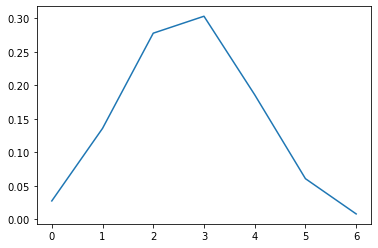

probability of 3: 0.74473609375
probality is  0.06919804687499997
0.550178578125


In [22]:
#Unbiased Estimator and MLE of Probability
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
n=6
p=0.45
s=np.random.binomial(n,p,1000)
pop_mean=n*p
sample_mean=np.mean(s)
print("population mean","sample mean",pop_mean,sample_mean)
print("sample mean is unbised estimator of population mean")
p_hat=(np.mean(s))/n
print("maximum likelihood estimator:",p_hat)

#Que(i)
x=np.arange(0,7)
prob=stat.binom.pmf(x,n,p)
plt.plot(x,prob)
plt.show()

#Que(ii)
b=3
p1=stat.binom.cdf(b,n,p)
print("probability of 3:",p1)

#Que(iii)
a=4
p2=1-stat.binom.cdf(a,n,p)
print("probality is ",p2)

#Que(iv)
p3=stat.binom.cdf(5,n,p)-stat.binom.cdf(2,n,p)
print(p3)

### Example 2. 
Consider the following data

    |  $y$  | 26 | 24 | 175 | 160 | 163 | 55 | 62 | 100 | 26 | 30 | 70 | 71 |
    |-------|----|----|-----|-----|-----|----|----|-----|----|----|----|----|
    | $x_1$ |  1 |  1 | 1.5 | 1.5 | 1.5 |  1 |  2 | 0.5 |  1 |  1 |  1 |  1 |
    | $x_2$ |  1 |  1 |  4  |  4  |  4  |  2 |  5 |  3  |  2 |  2 |  3 |  3 |

    Fit the linear regression model of$Y$ on$X_{1}$ and$X_{2}$.
    Obtain an estimate of pure error term and hence perform the lack of
    fit test.

### Example 3.  The yield of a chemical process is related to the concentration of
    the reactant and the operating temperature. An experiment has been
    conducted with the following results.\

    |     Yield     |  81 |  89 |  83 |  91 |  79 |  87 |  84 |  90 |
    |---------------|-----|-----|-----|-----|-----|-----|-----|-----|
    | Concentration |  1  |  1  |  2  |  2  |  1  |  1  |  2  |  2  |
    |  Temperature  | 150 | 180 | 150 | 180 | 150 | 180 | 150 | 180 |

    a.  Fit the linear regression model of$Y$ on$X_{1}$ and$X_{2}$.
    b.  Obtain an estimate of pure error term and hence perform the lack
        of fit test.

### Example 4.
A soft drink bottler is analyzing the vending machine service routes
    in his distribution system. He is interested in predicting the
    amount of time required by the route driver to service the vending
    machine in an outlet. The two most important variables affecting the
    delivery time$(y)$ are the number of cases of product
    stocked$\ (x_1)$ and the distance walked by the route
    driver$\ (x_2)$.

    |  $y$  | $x_1$ | $x_2$ |  $y$  | $x_1$ | $x_2$ |  $y$  | $x_1$ | $x_2$ |
    |:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
    | 16.68 |   7   |  560  |  21.5 |   5   |  605  |  9.5  |   3   |   36  |
    |  11.5 |   3   |  226  | 40.33 |   16  |  688  |  35.1 |   17  |  770  |
    | 12.03 |   3   |  340  |   21  |   10  |  215  |  17.9 |   10  |  140  |
    | 14.88 |   4   |   80  |  13.5 |   4   |  255  | 52.32 |   26  |  810  |
    | 13.75 |   6   |  150  | 19.75 |   6   |  462  | 18.75 |   9   |  450  |
    | 18.11 |   7   |  330  |   24  |   9   |  448  | 19.83 |   8   |  635  |
    |   8   |   2   |  110  |   29  |   10  |  776  | 10.75 |   4   |  150  |
    | 17.83 |   7   |  210  | 15.35 |   6   |  200  |       |       |       |
    | 79.24 |   30  |  1460 |   19  |   7   |  132  |       |       |       |    

    a.  Fit the linear regression model of$Y$ on$X_{1}$ and$X_{2}$.
    b.  Obtain (i) Standardized residuals (ii) Studentized residuals (iii) PRESS residuals (iv) Standardized PRESS residuals (v) R-student.
    c.  Obtain the specified residual plots (i) Normal Probability Plot for residuals (ii) Residuals Vs fitted values (iii) Residuals Vs $X_{1}$ (iv) Residuals Vs$X_{2}$.
    d.  Obtain PRESS and$R_\text{prediction}^2$
    e.  Construct and interpret a plot of residuals versus time order.
    f.  Study the effect of deleting outlier observations on $\hat{\beta}_i, se(\hat{\beta}_i), R^2, MS_\text{Res}$.

# Curvilinear/Polynomial Regression

### Example 1.
Table 3 presents the data concerning the strength of Kraft paper and the % of hardwood in the batch of pulp from which the paper was produced. Show that the quadratic model appears to provide a good fit to the relationship between tensile strength and hardwood concentration.

### Example 2.  
Fit the regression model as specified below for the data given in Table 2
   $$y=\beta_{0} +\beta_{1} x_{1} +\beta_{2} x_{2} +\beta_{11} x_{1}^{2} +\beta_{22} x_{2}^{2} +\beta_{12} x_{1}^{} x_{2}^{}$$
    a.  Compute$t$-statistic for each model parameter and conclude on the significance of corresponding regression parameter.
    b.  Use extra sum of squares method to evaluate the contribution of all the quadratic terms$x_{1}^{2} ,\, x_{2}^{2}$ and $x_{1} x_{2}$ in regression sum of squares for the regression model fitted in (a). Also test its significance.
    c.  Plot the residuals versus fitted values. Also have the Box plot of residuals to check the existence of any of the outlying observations.

### Example 3.  
The data concerning machine setting and the amount of energy
    consumed is given in Table 1. Observe the relationship in them by
    drawing scatter plot. Transform the data using log-transformation
    and fit the linear model for the transformed variables. Model the
    relationship between the machine setting and the amount of energy
    consumed with a quadratic model. Show that the quadratic model
    appears to provide a good fit to the data.

|  |  Table 1                  |                 |   |  |Table 2       |       |   | Table 3                               |                                   |
|:-------:|:------------------:|:---------------:|---|---------|-------|-------|---|---------------------------------------|-----------------------------------|
| Sr. No. | Energy Consumption | Machine Setting |   |   $y$   | $x_1$ | $x_2$ |   | Hardwood Conc.$\left(x_i\right)$ in % | Tensile Strength$(y_i)$ in $\psi$ |
|    1    |        21.6        |      11.15      |   |    26   |   1   |   1   |   |                   1                   |                6.3                |
|    2    |          4         |       15.7      |   |    24   |   1   |   1   |   |                  1.5                  |                11.1               |
|    3    |         1.8        |       18.9      |   |   175   |  1.5  |   4   |   |                   2                   |                 20                |
|    4    |          1         |       19.4      |   |   160   |  1.5  |   4   |   |                   3                   |                 24                |
|    5    |          1         |       21.4      |   |   163   |  1.5  |   4   |   |                   4                   |                26.1               |
|    6    |         0.8        |       21.7      |   |    55   |  0.5  |   2   |   |                  4.5                  |                 30                |
|    7    |         3.8        |       25.3      |   |    62   |  1.5  |   5   |   |                   5                   |                33.8               |
|    8    |         7.4        |       26.4      |   |   100   |  0.5  |   3   |   |                  5.5                  |                 34                |
|    9    |         4.3        |       26.7      |   |    26   |   1   |  1.5  |   |                   6                   |                38.1               |
|    10   |        36.2        |       29.1      |   |    30   |  0.5  |  1.5  |   |                  6.5                  |                39.9               |
|         |                    |                 |   |    70   |   1   |  2.5  |   |                   7                   |                 42                |
|         |                    |                 |   |    71   |  0.5  |  2.5  |   |                   8                   |                46.1               |
|         |                    |                 |   |         |       |       |   |                   9                   |                53.1               |
|         |                    |                 |   |         |       |       |   |                   10                  |                 52                |
|         |                    |                 |   |         |       |       |   |                   11                  |                52.5               |
|         |                    |                 |   |         |       |       |   |                   12                  |                 48                |
|         |                    |                 |   |         |       |       |   |                   13                  |                42.8               |
|         |                    |                 |   |         |       |       |   |                   14                  |                27.8               |
|         |                    |                 |   |         |       |       |   |                   15                  |                21.9               |

# Polynomial Regression using orthogonal Polynomial and Multicollinearity

### Example 1. 
An operations research analyst has developed a computer simulation
    model of a single of a single item inventory system. He has
    experimented with the simulation model to investigate the effect of
    various reorder quantities on the average annual cost of inventory.
    The data are as shown in the following table.

       Reorder Quantity$(x)$    50    75    100   125   150   175   200   225   250   275
      ------------------------ ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
       Avg Annual Cost$\ (y)$   335   326   316   313   311   314   318   328   337   345

    a.  Observe the scatter plot of the above data. Fit the second order
        polynomial that expresses the average annual cost as a function
        of reorder quantity. Use orthogonal polynomials to fit the
        model. Is there evidence that the quadratic term is
        statistically significant? Comment on the need for the quadratic
        term in the model.

    b.  Prepare a scatter plot of observed $y$ versus observed $x$.
        Overlay the fitted model on the scatter plot of $y$ versus $x$.

### Example 2. 
The development engineer is interested in determining if the cotton
    weight percent in a synthetic fiber affects the tensile strength. He
    has run the experiment with five levels of cotton weight percent and
    the average observed tensile strength for the respective levels are
    recorded. The data are as follows.

        Weight percent cotton$(x)$     15   20   25   30    35
      -------------------------------- ---- ---- ---- ----- ----
       Average tensile strength$(y)$   49   77   88   108   54

    Using orthogonal polynomials fit the quadratic model to regress the
    average tensile strength of the synthetic fiber on cotton weight
    percent in the fiber. Also test the significance of each linear,
    quadratic, cubic and quadratic term in the model. Prepare a scatter
    plot of observed$y$ versus observed$x$. Overlay the fitted model on
    the scatter plot of$y$ versus$x$.

### Example 3.
Following table presents data concerning the percentage of
    conversion of n-heptane to acetylene and three explanatory
    variables. (% conversion in acetylene (P),
   $\frac{{Reactor\ temp-1212.50}}{{80.623}}(T),$
   $\frac{{Ratio\ of\ }{{H}}_{{2}}{-12.44}}{{5.662}}$ (H),
   $\frac{{Contact\ Time-0.0403}}{{0.03164}}$ (C). Use this information
    for studying multicollinearity, VIF, Mallows Cp statistics,
    Condition indices, Condition number using subset regression models.
    (Response: P, Predictors: C, H, T, CH, HT, CT,$C^2{,H}^2,T^2$).

      |  % conversion |   49  |  50.2 |  50.5  |  48.5 |  47.5  |  44.5 |   28  |  31.5 |
      |:-------------:|:-----:|:-----:|:------:|:-----:|:------:|:-----:|:-----:|:-----:|
      | Reactor Temp. |  1300 |  1300 |  1300  |  1300 |  1300  |  1300 |  1200 |  1200 |
      |     $H_2$     |  7.5  |   9   |   11   |  13.5 |   17   |   23  |  5.3  |  7.5  |
      |  Contact Time | 0.012 | 0.012 | 0.0115 | 0.013 | 0.0135 | 0.012 |  0.04 | 0.038 |
      |  % conversion |  34.5 |   35  |   38   |  38.5 |   15   |   17  |  20.5 |  29.5 |
      | Reactor Temp. |  1200 |  1200 |  1200  |  1200 |  1100  |  1100 |  1100 |  1100 |
      |     $H_2$     |   11  |  13.5 |   17   |   23  |   5.3  |  7.5  |   11  |   17  |
      |  Contact Time | 0.032 | 0.026 |  0.034 | 0.041 |  0.084 | 0.098 | 0.092 | 0.086 |

# Nonlinear regression

### Example 1.
The initial velocity of an enzymatic reaction in chemical kinetics
    is related to the substrate concentration. The data for initial rate
    id a reaction for an enzyme treated with puromycin are as shown in
    the following table.\

    |    Concentration (ppm)    | 0.02 |  0.06 |  0.11  |  0.22  |  0.56  |   1.1  |
    |:-------------------------:|:----:|:-----:|:------:|:------:|:------:|:------:|
    | Velocity (counts/min)/min | 4776 | 97107 | 123139 | 152159 | 191201 | 200207 |
    
    1.  Plot the graph of (i) concentration Vs velocity (ii) 1/velocity
        Vs 1/concentration.

    2.  Fit the model
       $y=\theta_{1} x/\left(\theta_{2} +x\right)+\varepsilon$ to the
        above data by using appropriate transformation.

    3.  Overlay the graph of fitted curve in the original scale on the
        graph of concentration versus velocity. Also superimpose the
        fitted straight line for the transformed data on the scatter
        plot of transformed data.

### Example 2.
Consider the following observations
      $x$    $y$    
      ------ -------- --------
       0.5     0.68     1.58
       1.0     0.45     2.66
       2.0     2.50     2.04
       4.0     6.19     7.85
       8.0    56.10    54.20
       9.0    89.80    90.20
       10.0   147.70   146.30

    1.  Fit the nonlinear regression model
       $y=\theta_1 e^(\theta_2 x)+\epsilon$ to these data. Discuss how
        you obtained the starting values.

    2.  Test for significance of regression

    3.  Estimate the error variance$\sigma^2$.

    4.  Test the hypotheses$H_0:\theta_1=0$ and$H_0:\theta_2=0$ Are
        both model parameters different from zero? If not, refit an
        appropriate model.

    5.  Analyze the residuals from this model. Discuss model adequacy.

# Logistic Regression

### Example 1. 
The table below presents the test-firing results for 25
    surface-to-air antiaircraft missiles at targets of varying speed.
    The result of each test is either a hit ($y = 1$) or a miss
    ($y = 0$).

       Test   Target Speed x (Knots)   y   Test   Target Speed x (Knots)   y
      ------ ------------------------ --- ------ ------------------------ ---
        1              400             0    14             330             1
        2              220             1    15             280             1
        3              490             0    16             210             1
        4              210             1    17             300             1
        5              500             0    18             470             1
        6              270             0    19             230             0
        7              200             1    20             430             0
        8              470             0    21             460             0
        9              480             0    22             220             1
        10             310             1    23             250             1
        11             240             1    24             200             1
        12             490             0    25             390             0
        13             420             0                                  

    1.  Fit a logistic regression model to the response variable y. Use
        a simple linear regression model as the structure for the linear
        predictor.
    2.  Does the model deviance indicate that the logistic regression
        model from part a is adequate?
    3.  Provide an interpretation of the parameter$\beta_1$ in this
        model.
    4.  Expand the linear predictor to include a quadratic term in
        target speed. Is there any evidence that this quadratic term is
        required in the model?

### Example 2. 
A study was conducted attempting to relate home ownership to family
    income. Twenty households were selected and family income was
    estimated, along with information concerning home ownership ($y = 1$
    indicates yes and$y = 0$ indicates no). The data are shown below.

       Household   Income   Home Ownership Status   Household   Income   Home Ownership Status
      ----------- -------- ----------------------- ----------- -------- -----------------------
           1       38000              0                11       38700              1
           2       51200              1                12       40100              0
           3       39600              0                13       49500              1
           4       43400              1                14       38000              0
           5       47700              0                15       42000              1
           6       53000              0                16       54000              1
           7       41500              1                17       51700              1
           8       40800              0                18       39400              0
           9       45400              1                19       40900              0
          10       52400              1                20       52800              1

    a.  Fit a logistic regression model to the response variable y. Use
        a simple linear regression model as the structure for the linear
        predictor.
    b.  Does the model deviance indicate that the logistic regression
        model from part a is adequate?
    c.  Provide an interpretation of the parameter$\beta_1$ in this
        model.
    d.  Expand the linear predictor to include a quadratic term in
        income. Is there any evidence that this quadratic term is
        required in the model?

### Example 3.
A study was performed to investigate new automobile purchases. A
    sample of 20 families was selected. Each family was surveyed to
    determine the age of their oldest vehicle and their total family
    income. A follow - up survey was conducted 6 months later to
    determine if they had actually purchased a new vehicle during that
    time period (y = 1 indicates yes and y = 0 indicates no). The data
    from this study are shown in the following table.

       Income$x_1$   Age$x_2$   y   Income$x_1$   Age$x_2$   y
      -------------- ----------- --- -------------- ----------- ---
          45000           2       0      37000           5       1
          40000           4       0      31000           7       1
          60000           3       1      40000           4       1
          50000           2       1      75000           2       0
          55000           2       0      43000           9       1
          50000           5       1      49000           2       0
          35000           7       1      37500           4       1
          65000           2       1      71000           1       0
          53000           2       0      34000           5       0
          48000           1       0      27000           6       0
    1.  Fit a logistic regression model to the data.
    2.  Does the model deviance indicate that the logistic regression
        model from part i) is adequate?
    3.  Interpret the model coefficients$\beta_1$ and$\beta_2$.
    4.  What is the estimated probability that a family with an income
        of \$45,000 and a car that is 5 years old will purchase a new
        vehicle in the next 6 months?
    5.  Expand the linear predictor to include an interaction term. Is
        there any evidence that this term is required in the model?
    6.  For the model in part i), find statistics for each individual
        model parameter.
    7.  Find approximate 95% confidence intervals on the model
        parameters for the logistic regression model from part a).